In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/1577957291_deeplearningwithkerasandtensorflow.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#import all the require labraries 


import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers 

In [ ]:
dataflow = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
#import training dataset
train = dataflow.flow_from_directory('/content/data/train', class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [ ]:
#import test data from file
test = dataflow.flow_from_directory('/content/data/test', class_mode='categorical')

Found 20 images belonging to 2 classes.


In [ ]:
#build model according to 
#Input layer ● Convolutional layer 1 with 32 filters of kernel size[5,5] 
#Pooling layer 1 with pool size[2,2] and stride
#Convolutional layer 2 with 64 filters of kernel size[5,5]
#Pooling layer 2 with pool size[2,2] and stride 2
#Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
#Dropout layer with dropout probability 0.4 Predict the class by doing a softmax on the output of the dropout layers. This should be followed by training and evaluation: 

model = models.Sequential()
model.add( layers.Conv2D( 32,(5,5) ,activation='relu',padding='same',input_shape=(256,256,3)))
model.add( layers.MaxPooling2D(2,2))
model.add( layers.Conv2D( 64,(5,5), activation='relu' ))
model.add( layers.MaxPooling2D(2,2))
model.add( layers.Dropout(0.4))
model.add( layers.Flatten())
model.add( layers.Dense(32,activation='relu'))
model.add( layers.Dense(2,activation='softmax'))

In [ ]:
#For the training step, define the loss function and minimize it
sgd_opt = tf.keras.optimizers.SGD(lr = 0.001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#compiling model 
history = model.compile( optimizer= sgd_opt,loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#model train for 100 epochs 
history = model.fit(train, validation_data = test, epochs=100)

Epoch 1/100
2/2 [==============================] - 9s 816ms/step - loss: 0.6913 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 278ms/step - loss: 0.7068 - accuracy: 0.5250 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 283ms/step - loss: 0.7004 - accuracy: 0.4750 - val_loss: 0.6842 - val_accuracy: 0.5500
Epoch 4/100
2/2 [==============================] - 0s 139ms/step - loss: 0.6886 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 276ms/step - loss: 0.6739 - accuracy: 0.5750 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 137ms/step - loss: 0.6694 - accuracy: 0.6250 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 136ms/step - loss: 0.6784 - accuracy: 0.5000 - val_loss: 0.7146 - val_accuracy: 0.5000
Epoch 8/100
2

In [ ]:
test_loss,test_accuracy= model.evaluate(test)

1/1 [==============================] - 0s 322ms/step - loss: 0.7753 - accuracy: 0.4500


In [ ]:
test_loss

0.7753384709358215

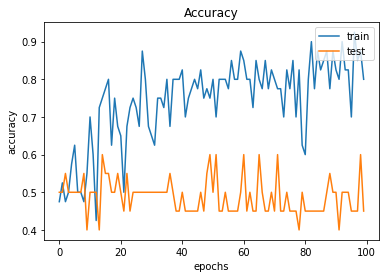

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
history =model.fit(train, validation_data = test, epochs =200)



Epoch 1/200
2/2 [==============================] - 0s 384ms/step - loss: 0.3993 - accuracy: 0.8250 - val_loss: 0.7809 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 151ms/step - loss: 0.3674 - accuracy: 0.8500 - val_loss: 0.9175 - val_accuracy: 0.5500
Epoch 3/200
2/2 [==============================] - 0s 283ms/step - loss: 0.5029 - accuracy: 0.7500 - val_loss: 0.7735 - val_accuracy: 0.4500
Epoch 4/200
2/2 [==============================] - 0s 154ms/step - loss: 0.3368 - accuracy: 0.8750 - val_loss: 0.7679 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 139ms/step - loss: 0.3872 - accuracy: 0.8250 - val_loss: 1.0445 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 141ms/step - loss: 0.5325 - accuracy: 0.6750 - val_loss: 0.7761 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 144ms/step - loss: 0.3592 - accuracy: 0.8250 - val_loss: 0.8001 - val_accuracy: 0.6500
Epoch 8/200
2

In [ ]:
test_loss, test_accuracy = model.evaluate(test)


1/1 [==============================] - 0s 126ms/step - loss: 1.0825 - accuracy: 0.6000


In [ ]:
test_loss


1.0825061798095703

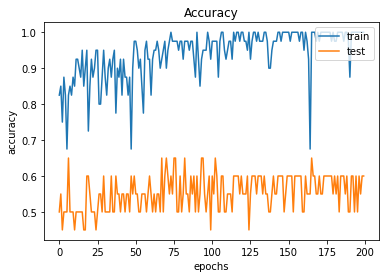

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()



In [ ]:

history =model.fit(train, validation_data = test, epochs =300)


Epoch 1/300
2/2 [==============================] - 0s 391ms/step - loss: 0.0570 - accuracy: 1.0000 - val_loss: 1.0911 - val_accuracy: 0.5500
Epoch 2/300
2/2 [==============================] - 0s 295ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 1.0917 - val_accuracy: 0.5500
Epoch 3/300
2/2 [==============================] - 0s 297ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 1.0855 - val_accuracy: 0.6000
Epoch 4/300
2/2 [==============================] - 0s 142ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 1.1230 - val_accuracy: 0.6000
Epoch 5/300
2/2 [==============================] - 0s 295ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 1.1059 - val_accuracy: 0.6000
Epoch 6/300
2/2 [==============================] - 0s 139ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 1.1152 - val_accuracy: 0.6000
Epoch 7/300
2/2 [==============================] - 0s 277ms/step - loss: 0.0905 - accuracy: 0.9500 - val_loss: 1.2177 - val_accuracy: 0.5500
Epoch 8/300
2

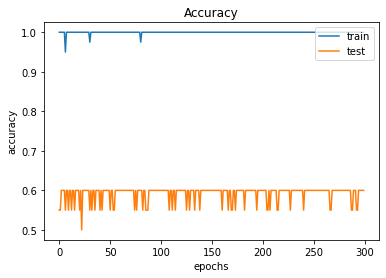

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test)
test_loss

1/1 [==============================] - 0s 123ms/step - loss: 1.5494 - accuracy: 0.6000


1.5494447946548462